In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

#load the dataset
df = pd.read_csv("/content/drive/MyDrive/Assignment/WHR-2024-5CS037.csv")
#first 10 rows
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [10]:
#the shape of the DataFrame (rows,columns)
n_rows,n_cols = df.shape
print(f"There are {n_rows} rows and {n_cols} columns")

There are 143 rows and 9 columns


In [11]:
#all columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   score                         143 non-null    float64
 2   Log GDP per capita            140 non-null    float64
 3   Social support                140 non-null    float64
 4   Healthy life expectancy       140 non-null    float64
 5   Freedom to make life choices  140 non-null    float64
 6   Generosity                    140 non-null    float64
 7   Perceptions of corruption     140 non-null    float64
 8   Dystopia + residual           140 non-null    float64
dtypes: float64(8), object(1)
memory usage: 10.2+ KB


In [12]:
df.dtypes #check data types of all columns

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


In [13]:
#the mean ,median and standard deviation for a specific column
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()
print(f"Mean Score: {mean_score}, Median Score: {median_score}, Standard Deviation: {std_score}")

Mean Score: 5.52758041958042, Median Score: 5.785, Standard Deviation: 1.1707165099442995


In [14]:
# Get the country with the highest score
highest_score_country = df.loc[df['score'].idxmax(), 'Country name']

# Get the country with the lowest score
lowest_score_country = df.loc[df['score'].idxmin(), 'Country name']

print(f"Highest Score Country: {highest_score_country}, Lowest Score Country: {lowest_score_country}")


Highest Score Country: Finland, Lowest Score Country: Afghanistan


In [15]:
#3. Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in columns:")
print(missing_values)


Missing values in columns:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [16]:
#filtering countries with score greater then 7.5
filtered_df = df[df['score'] > 7.5]
print("Countries with a Score greater than 7.5:")
print(filtered_df)

Countries with a Score greater than 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [17]:
#Sort the filtered dataset by GDP in descending order and display 10 rows
sorted_df = filtered_df.sort_values(by = 'Log GDP per capita',ascending = True)
print(sorted_df.head(10))

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
2      Iceland  7.525               1.881           1.617   
1      Denmark  7.583               1.908           1.520   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
2                    0.718                         0.819       0.258   
1                    0.699                         0.823       0.204   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
2                      0.182                2.050  
1                      0.548                1.881  


In [18]:
#create a new column
def categorize_happiness(score):
  if score <4:
    return 'LOW'
  elif 4<=score<=6:
      return 'Medium'
  else:
    return 'High'

  df['Happiness Category'] = df ['score'].apply(categorize_happiness)
  print(df[['Country name','score','Happiness Category']])

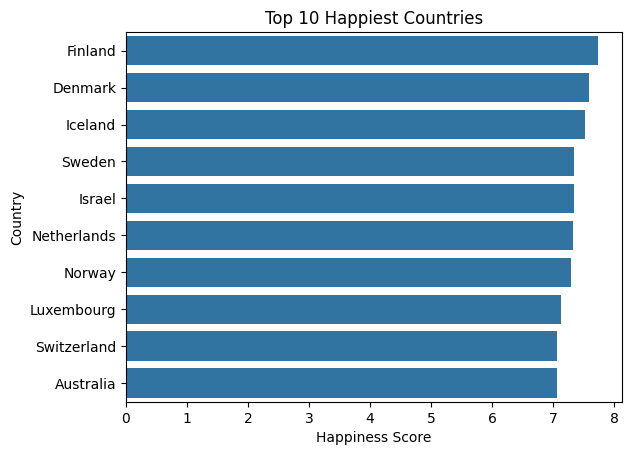

In [19]:
#Bar plot

import matplotlib.pyplot as plt
import seaborn as sns

top_10_happiest = df.sort_values('score',ascending = False).head(10)
sns.barplot(x='score',y='Country name',data=top_10_happiest)
plt.title('Top 10 Happiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

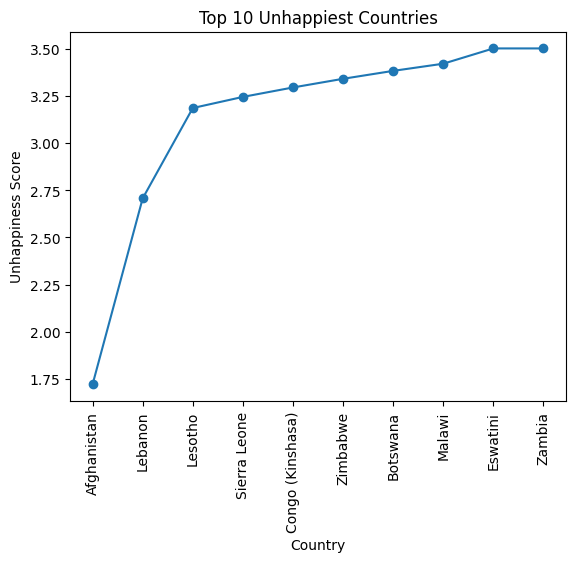

In [20]:
#line plot
import matplotlib.pyplot as plt


top_10_unhappiest = df.sort_values('score',ascending = True).head(10)
plt.plot(top_10_unhappiest['Country name'],top_10_unhappiest['score'],marker ='o')
plt.title('Top 10 Unhappiest Countries')
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Unhappiness Score')
plt.show()

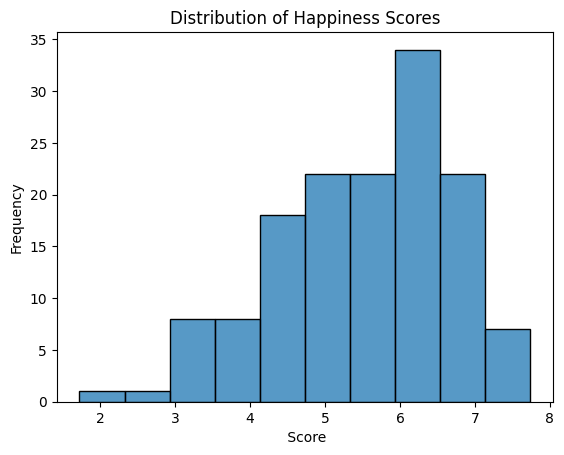

In [21]:
#histogram for score column
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['score'])
plt.title('Distribution of Happiness Scores')
plt.xlabel(' Score')
plt.ylabel('Frequency')
plt.show()


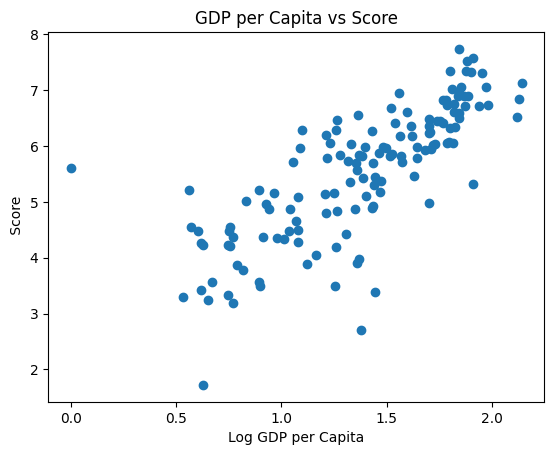

In [22]:
#scatter plot for GDP per Capita vs Score
import matplotlib.pyplot as plt


plt.scatter(df['Log GDP per capita'],df['score'])
plt.title('GDP per Capita vs Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel(' Score')
plt.show()

In [23]:
#preparing south asia dataset

south_asian_countries =["Afghanistan","Bangladesh","Bhutan","India","Maldives","Nepal","Pakistan","Sri Lanka"]

#filtering south asian countries
south_asian_df = df[df['Country name'].isin(south_asian_countries)]

#save to csv
south_asian_df.to_csv('south_asian_countries.csv',index = False)

In [38]:
#Composite score Ranking
south_asian_df[ 'Composite Score']=(0.40*south_asian_df['Log GDP per capita'])+(0.30*south_asian_df['Social support'])+(0.20*south_asian_df['Healthy life expectancy'])
ranked_df = south_asian_df.sort_values(by = 'Composite Score',ascending =False)
print(ranked_df[['Country name','Composite Score']])

    Country name  Composite Score
127    Sri Lanka           1.0153
92         Nepal           0.7716
125        India           0.7457
107     Pakistan           0.6718
128   Bangladesh           0.6261
142  Afghanistan           0.2996


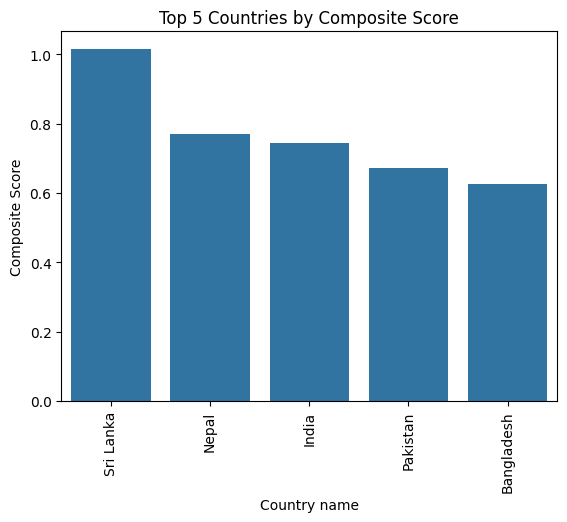

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

#Top 5 countries
top_five = ranked_df.head(5)

# Create a bar plot
sns.barplot(x='Country name', y='Composite Score', data=top_five)
plt.title('Top 5 Countries by Composite Score')
plt.xticks(rotation=90)
plt.show()

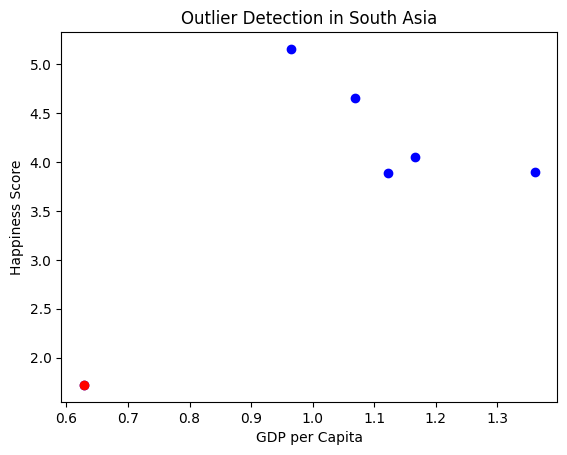

In [26]:
#Outlier Detection
#import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#calculate Interquartile range for score
Q1 = np.percentile(df['score'],25)
Q3 = np.percentile(df['score'],75)
IQR = Q3-Q1

#outliners

outliers = south_asian_df[(south_asian_df['score'] < (Q1 - 1.5 * IQR)) | (south_asian_df['score'] > (Q3 + 1.5 * IQR))]

# Scatter plot
plt.scatter(south_asian_df['Log GDP per capita'], south_asian_df['score'], color='blue', label='Normal Points')
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Outlier Detection in South Asia')
plt.show()



In [27]:
#4
correlation = south_asian_df[['Freedom to make life choices','Generosity','score']].corr()
print("Correlation:",correlation)

Correlation:                               Freedom to make life choices  Generosity  \
Freedom to make life choices                      1.000000    0.733396   
Generosity                                        0.733396    1.000000   
score                                             0.800519    0.874512   

                                 score  
Freedom to make life choices  0.800519  
Generosity                    0.874512  
score                         1.000000  


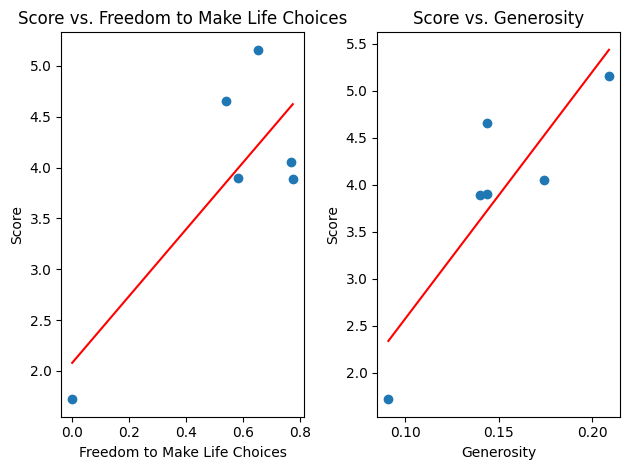

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot for Freedom to Make Life Choices
plt.subplot(1, 2, 1)
plt.scatter(south_asian_df['Freedom to make life choices'], south_asian_df['score'])
plt.plot(np.unique(south_asian_df['Freedom to make life choices']), np.poly1d(np.polyfit(south_asian_df['Freedom to make life choices'], south_asian_df['score'], 1))(np.unique(south_asian_df['Freedom to make life choices'])), color='red') # Replaced df_south_asian with south_asian_df
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.title('Score vs. Freedom to Make Life Choices')

# Scatter plot for Generosity
plt.subplot(1, 2, 2)
plt.scatter(south_asian_df['Generosity'], south_asian_df['score'])
plt.plot(np.unique(south_asian_df['Generosity']), np.poly1d(np.polyfit(south_asian_df['Generosity'], south_asian_df['score'], 1))(np.unique(south_asian_df['Generosity'])), color='red') # Replaced df_south_asian with south_asian_df
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.title('Score vs. Generosity')

plt.tight_layout()
plt.show()

In [39]:
#filter data for middle east countries and save the csv
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
                         "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
                         "Syria", "United Arab Emirates", "Yemen"]

# Filter and save
middle_east_df = df[df['Country name'].isin(middle_east_countries)]
middle_east_df.to_csv('middle_east_happiness.csv', index=False)


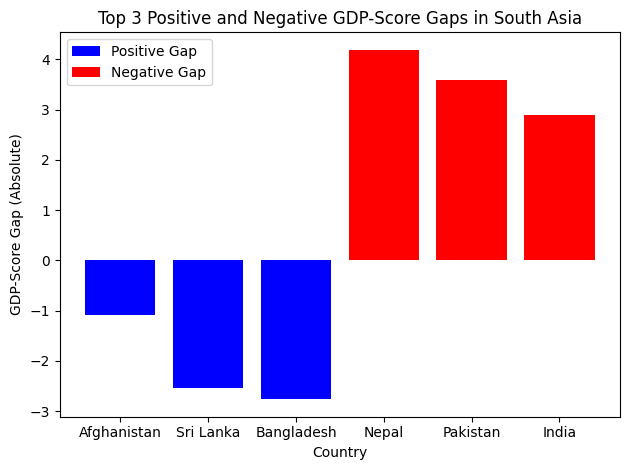

In [42]:
import matplotlib.pyplot as plt

# 1. Filter and make a copy for South Asian countries
south_asian_df = df[df['Country name'].isin(south_asian_countries)].copy()

# Add the new column for GDP-Score Gap
south_asian_df['GDP-Score Gap'] = south_asian_df['Log GDP per capita'] - south_asian_df['score']

# 2. Rank countries by GDP-Score Gap
ascending_gap = south_asian_df.sort_values(by='GDP-Score Gap', ascending=True)
descending_gap = south_asian_df.sort_values(by='GDP-Score Gap', ascending=False)

# 3. Top 3 positive and negative gaps
top_positive_gap = descending_gap.head(3)
top_negative_gap = ascending_gap.head(3)
import matplotlib.pyplot as plt

#  absolute values for plotting but keep the labels to distinguish positive and negative
plt.bar(top_positive_gap['Country name'], top_positive_gap['GDP-Score Gap'], label='Positive Gap', color='blue')
plt.bar(top_negative_gap['Country name'], abs(top_negative_gap['GDP-Score Gap']), label='Negative Gap', color='red')  # Absolute value
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap (Absolute)')
plt.title('Top 3 Positive and Negative GDP-Score Gaps in South Asia')
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
#mean and standard deviation for score in South Asia and Middle East
mean_south_asia = south_asian_df['score'].mean()
std_south_asia = south_asian_df['score'].std()

mean_middle_east = middle_east_df['score'].mean()
std_middle_east = middle_east_df['score'].std()

print(f"South Asia - Mean Score: {mean_south_asia}, Standard Deviation: {std_south_asia}")
print(f"Middle East - Mean Score: {mean_middle_east}, Standard Deviation: {std_middle_east}")

South Asia - Mean Score: 3.895666666666667, Standard Deviation: 1.1770690152521504
Middle East - Mean Score: 5.412100000000001, Standard Deviation: 1.5662011684327144


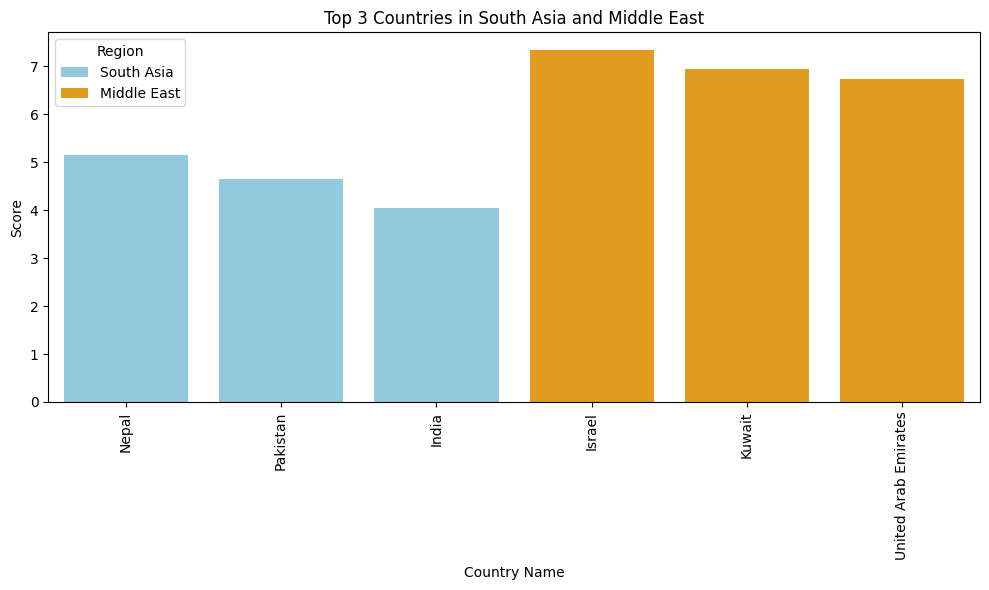

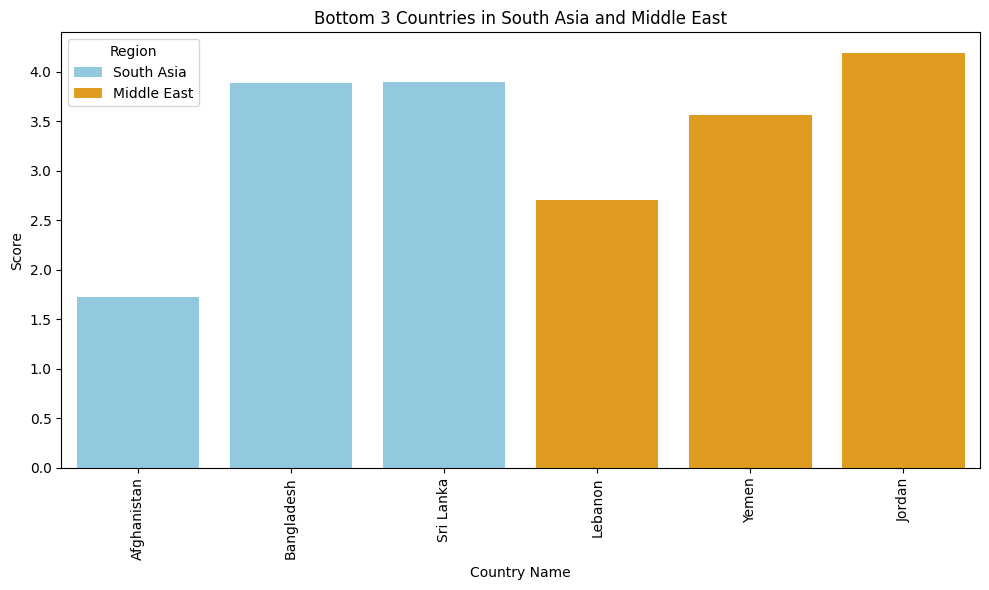

In [43]:
#top 3 and bottom
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Top 3 and bottom performers
top_3_sa = south_asian_df.nlargest(3, 'score')
bottom_3_sa = south_asian_df.nsmallest(3, 'score')

top_3_me = middle_east_df.nlargest(3, 'score')
bottom_3_me = middle_east_df.nsmallest(3, 'score')

# Bar chart for top
plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_sa['Country name'], y=top_3_sa['score'], color='skyblue', label='South Asia')
sns.barplot(x=top_3_me['Country name'], y=top_3_me['score'], color='orange', label='Middle East')
plt.title('Top 3 Countries in South Asia and Middle East')
plt.xticks(rotation=90)
plt.ylabel('Score')
plt.xlabel('Country Name')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

# Bar chart for bottom
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_3_sa['Country name'], y=bottom_3_sa['score'], color='skyblue', label='South Asia')
sns.barplot(x=bottom_3_me['Country name'], y=bottom_3_me['score'], color='orange', label='Middle East')
plt.title('Bottom 3 Countries in South Asia and Middle East')
plt.xticks(rotation=90)
plt.ylabel('Score')
plt.xlabel('Country Name')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

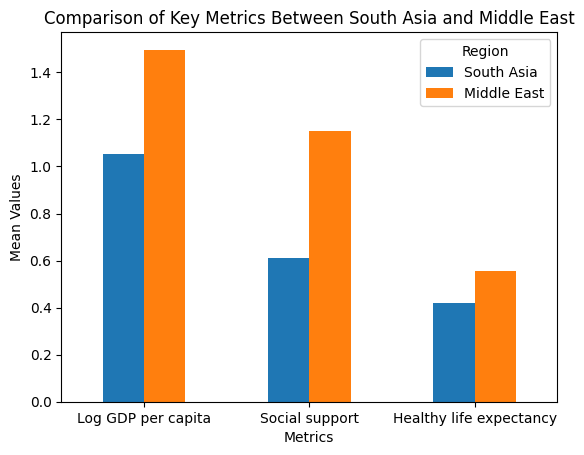

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Calculating mean for each region and metric
south_asia_means = south_asian_df[metrics].mean()
middle_east_means = middle_east_df[metrics].mean()

# Creating a DataFrame to store the values
comparison_df = pd.DataFrame({
    'Metric': metrics,
    'South Asia': south_asia_means.values,
    'Middle East': middle_east_means.values
})

# Plotting a grouped bar chart
comparison_df.set_index('Metric').plot(kind='bar')
plt.title('Comparison of Key Metrics Between South Asia and Middle East')
plt.ylabel('Mean Values')
plt.xlabel('Metrics')
plt.xticks(rotation=0)
plt.legend(title='Region')
plt.show()


In [41]:
#range for Score
range_south_asia = south_asian_df['score'].max() - south_asian_df['score'].min()
range_middle_east = middle_east_df['score'].max() - middle_east_df['score'].min()

#Coefficient of Variation (CV) for Score
cv_south_asia = (south_asian_df['score'].std() / south_asian_df['score'].mean()) * 100
cv_middle_east = (middle_east_df['score'].std() / middle_east_df['score'].mean()) * 100

# Display results
print(f"South Asia - Range: {range_south_asia}, Coefficient of Variation (CV): {cv_south_asia}%")
print(f"Middle East - Range: {range_middle_east}, Coefficient of Variation (CV): {cv_middle_east}%")


South Asia - Range: 3.4370000000000003, Coefficient of Variation (CV): 30.21482883337427%
Middle East - Range: 4.634, Coefficient of Variation (CV): 28.938880812119404%


South Asia Correlation:
Freedom to make life choices    0.800519
Generosity                      0.874512
Name: score, dtype: float64

Middle East Correlation:
Freedom to make life choices    0.863220
Generosity                      0.627524
Name: score, dtype: float64



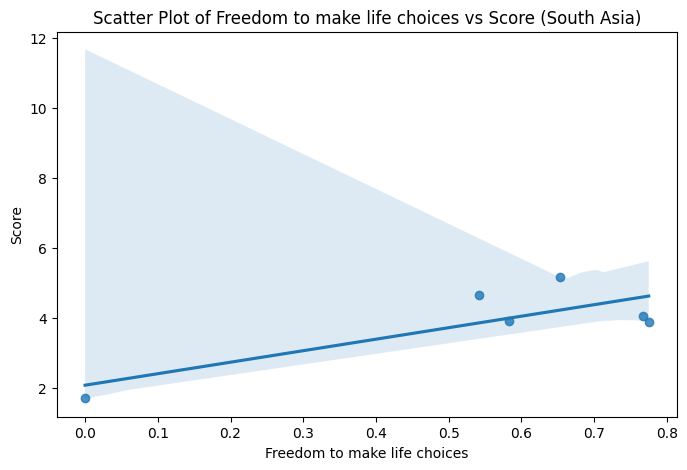

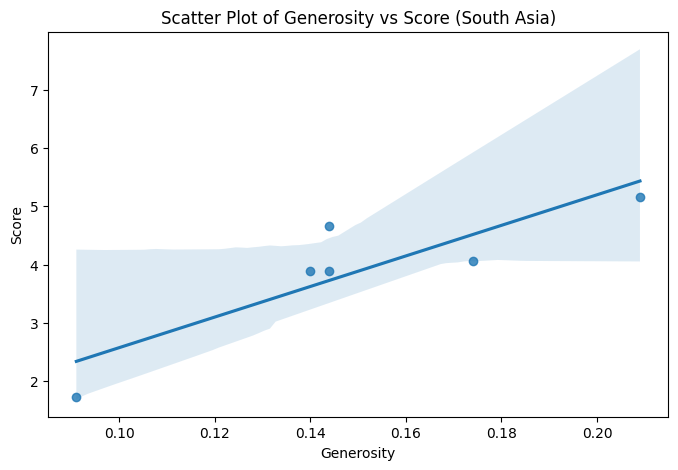

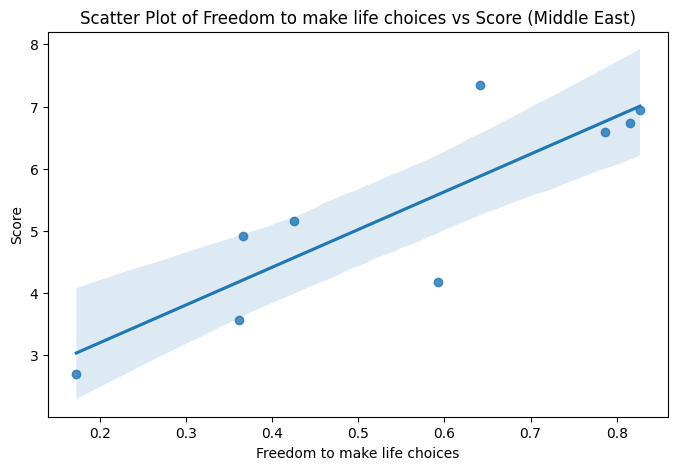

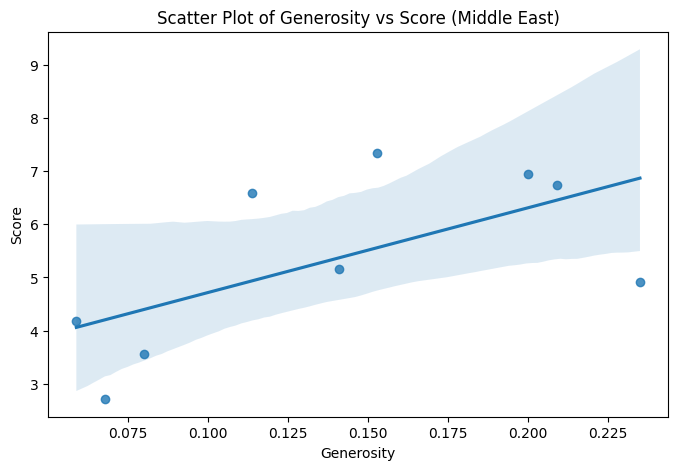

In [34]:
import seaborn as sns

# Metrics to analyze correlation with Score
correlation_metrics = ['Freedom to make life choices', 'Generosity']

# correlation of Score with each metric for South Asia
correlation_south_asia = south_asian_df[['score'] + correlation_metrics].corr().loc['score', correlation_metrics]
correlation_middle_east = middle_east_df[['score'] + correlation_metrics].corr().loc['score', correlation_metrics]

# correlation coefficients
print(f"South Asia Correlation:\n{correlation_south_asia}\n")
print(f"Middle East Correlation:\n{correlation_middle_east}\n")

# Plot scatter plots for each metric vs Score for South Asia
for metric in correlation_metrics:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=south_asian_df[metric], y=south_asian_df['score'])
    plt.title(f'Scatter Plot of {metric} vs Score (South Asia)')
    plt.xlabel(metric)
    plt.ylabel('Score')
    plt.show()

# Plot scatter plots for each metric vs Score for Middle East
for metric in correlation_metrics:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=middle_east_df[metric], y=middle_east_df['score'])
    plt.title(f'Scatter Plot of {metric} vs Score (Middle East)')
    plt.xlabel(metric)
    plt.ylabel('Score')
    plt.show()


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming south_asia_df and middle_east_df are the DataFrames
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers for Score and GDP per Capita
outliers_south_asian_score = detect_outliers(south_asian_df, 'score')
outliers_south_asian_gdp = detect_outliers(south_asian_df, 'Log GDP per capita')

outliers_middle_east_score = detect_outliers(middle_east_df, 'score')
outliers_middle_east_gdp = detect_outliers(middle_east_df, 'Log GDP per capita')

# Print the outliers for each region
print("Outliers in South Asia based on Score:\n", outliers_south_asian_score[['Country name', 'score']])
print("Outliers in South Asia based on GDP per Capita:\n", outliers_south_asian_gdp[['Country name', 'Log GDP per capita']])

print("Outliers in Middle East based on Score:\n", outliers_middle_east_score[['Country name', 'score']])
print("Outliers in Middle East based on GDP per Capita:\n", outliers_middle_east_gdp[['Country name', 'Log GDP per capita']])




Outliers in South Asia based on Score:
     Country name  score
142  Afghanistan  1.721
Outliers in South Asia based on GDP per Capita:
     Country name  Log GDP per capita
142  Afghanistan               0.628
Outliers in Middle East based on Score:
 Empty DataFrame
Columns: [Country name, score]
Index: []
Outliers in Middle East based on GDP per Capita:
 Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


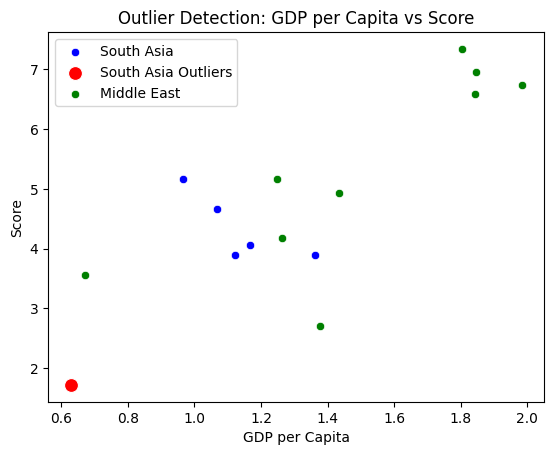

In [36]:

#  Scatter Plot for Outliers

sns.scatterplot(x=south_asian_df['Log GDP per capita'], y=south_asian_df['score'], label='South Asia', color='blue')
sns.scatterplot(x=outliers_south_asian_gdp['Log GDP per capita'], y=outliers_south_asian_gdp['score'], label='South Asia Outliers', color='red', s=100)

sns.scatterplot(x=middle_east_df['Log GDP per capita'], y=middle_east_df['score'], label='Middle East', color='green')
sns.scatterplot(x=outliers_middle_east_gdp['Log GDP per capita'], y=outliers_middle_east_gdp['score'], label='Middle East Outliers', color='orange', s=100)

plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.title('Outlier Detection: GDP per Capita vs Score')
plt.legend()
plt.show()

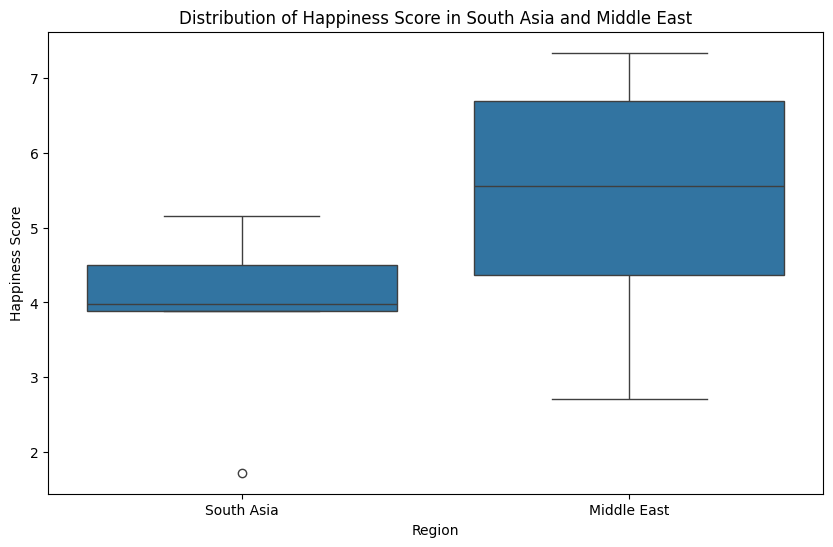

In [37]:
import seaborn as sns

# Create separate DataFrames with copy() so the changes made doesnot affect the original df
south_asian_df = df[df['Country name'].isin(south_asian_countries)].copy()
middle_east_df = df[df['Country name'].isin(middle_east_countries)].copy()

#Add 'Region' column
south_asian_df['Region'] = 'South Asia'
middle_east_df['Region'] = 'Middle East'

combined_df = pd.concat([south_asian_df[['Region', 'score']], middle_east_df[['Region', 'score']]])

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_df) # Change 'Score' to 'score'

plt.title('Distribution of Happiness Score in South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()